In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\shakera\Desktop\job\datacamp\datacamp\project6\police.csv')
df.head()

state  stop_date stop_time  county_name driver_gender driver_race  \
0    RI   1/4/2005     12:55          NaN             M       White   
1    RI  1/23/2005     23:15          NaN             M       White   
2    RI  2/17/2005      4:15          NaN             M       White   
3    RI  2/20/2005     17:15          NaN             M       White   
4    RI  2/24/2005      1:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       False      0-15 Min               False  Zone X4  
1       Citation       False      0-15 Min               False  Zone K3  
2       Citation       False      0-15 Min               False  Zone X4  
3  Arrest Driver        True     16-30 Min               False  Zone X1  
4       Citation       False      0-15 Min               False  Zone X3

In [3]:
df.isnull().head()

state  stop_date  stop_time  county_name  driver_gender  driver_race  \
0  False      False      False         True          False        False   
1  False      False      False         True          False        False   
2  False      False      False         True          False        False   
3  False      False      False         True          False        False   
4  False      False      False         True          False        False   

   violation_raw  violation  search_conducted  search_type  stop_outcome  \
0          False      False             False         True         False   
1          False      False             False         True         False   
2          False      False             False         True         False   
3          False      False             False         True         False   
4          False      False             False         True         False   

   is_arrested  stop_duration  drugs_related_stop  district  
0        False          False               False     False  
1        False          False               False     False  
2        False          False               False     False  
3        False          False               False     False  
4        False          False               False     False

In [4]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
df.shape

(91741, 15)

In [6]:
df.dropna(subset=['stop_date','stop_time'],inplace=True)

In [7]:
df.drop('county_name',axis='columns',inplace=True)

In [8]:
df.head()

state  stop_date stop_time driver_gender driver_race  \
0    RI   1/4/2005     12:55             M       White   
1    RI  1/23/2005     23:15             M       White   
2    RI  2/17/2005      4:15             M       White   
3    RI  2/20/2005     17:15             M       White   
4    RI  2/24/2005      1:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       False      0-15 Min               False  Zone X4  
1       Citation       False      0-15 Min               False  Zone K3  
2       Citation       False      0-15 Min               False  Zone X4  
3  Arrest Driver        True     16-30 Min               False  Zone X1  
4       Citation       False      0-15 Min               False  Zone X3

In [9]:
df.shape

(91741, 14)

In [10]:
df.drop(['state'],axis='columns',inplace=True)

In [11]:
df.shape

(91741, 13)

In [12]:
df.dropna(subset=['driver_gender'], inplace=True)

In [13]:
df.shape

(86536, 13)

In [14]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [15]:
df.is_arrested.dtype

dtype('O')

In [16]:
df['is_arrested']=df.is_arrested.astype('bool')
df.is_arrested.dtype
print(df.iloc[:, 0:4].head())
print(df.stop_date.dtype, df.stop_time.dtype)

   stop_date stop_time driver_gender driver_race
0   1/4/2005     12:55             M       White
1  1/23/2005     23:15             M       White
2  2/17/2005      4:15             M       White
3  2/20/2005     17:15             M       White
4  2/24/2005      1:20             F       White
object object


In [17]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = df.stop_date.str.cat(df.stop_time,sep=' ')

# Convert 'combined' to datetime format
df['stop_datetime'] =pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(df.stop_datetime.dtype)

datetime64[ns]


In [18]:
# Set 'stop_datetime' as the index
df.set_index('stop_datetime', inplace=True)

# Examine the index
print(df.index)

# Examine the columns
print(df.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [19]:
df.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [20]:
77091/86536

0.8908546731995932

In [21]:
df.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [22]:
df.driver_race.value_counts()


White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [23]:
white=df[df['driver_race']=='White']

In [24]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [25]:
# Count the unique values in 'violation'
print(df.violation.value_counts())

# Express the counts as proportions
print(df.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [26]:
# Create a DataFrame of female drivers
female = df[df.driver_gender == 'F']

# Create a DataFrame of male drivers
male = df[df.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [27]:
female_arrested=df[(df.driver_gender=='F') & (df.is_arrested==True)]

In [28]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = df[(df.driver_gender=='F')&(df.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = df[(df.driver_gender=='M')&(df.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [29]:
df.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [30]:
import numpy as np

In [31]:
df.is_arrested.mean()

0.0355690117407784

In [32]:
df.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [33]:
df[df.district=='Zone K1'].mean()

search_conducted      0.034716
is_arrested           0.024349
drugs_related_stop    0.009282
dtype: float64

In [34]:
df.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [35]:
# Check the data type of 'search_conducted'
print(df.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(df.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(df.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [36]:
# Calculate the search rate for male drivers
print(df[df.driver_gender=='M'].search_conducted.mean())

0.04542557598546892


In [37]:
# Calculate the search rate for both groups simultaneously
print(df.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [38]:
# Calculate the search rate for each combination of gender and violation
print(df.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [39]:
# Count the 'search_type' values
print(df.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(df.frisk.dtypes)

# Take the sum of 'frisk'
print(df.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [40]:
# Create a DataFrame of stops in which a search was conducted
searched = df[df.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate.This section is find out whether the arrest rate varies by time of day.

First,calculate the arrest rate across all stops in the *df* DataFrame. Then,calculate the hourly arrest rate by using the *hour* attribute of the index. The *hour* ranges from 0 to 23, in which:

- 0 = midnight
- 12 = noon
- 23 = 11 PM

In [41]:
# Calculate the overall arrest rate
print(df.is_arrested.mean())

# Calculate the hourly arrest rate
print(df.groupby(df.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


# Plotting the hourly arrest rate
In this exercise, I'll create a line plot from the *hourly_arrest_rate* object. A line plot is appropriate in this case because this showing how a quantity changes over time.

This plot should helps us to spot some trends that may not have been obvious when examining the raw numbers!

In [42]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

# Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise,we'll assess whether these drug-related stops are becoming more common over time.

The Boolean column *drugs_related_stop* indicates whether drugs were found during a given stop. we'll calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


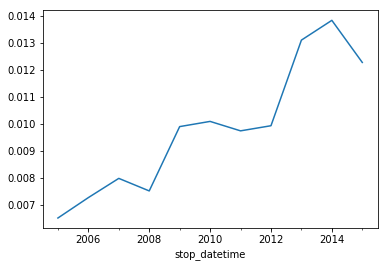

In [43]:
# Calculate the annual rate of drug-related stops
print(df.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = df.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

# Comparing drug and search rates
In the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

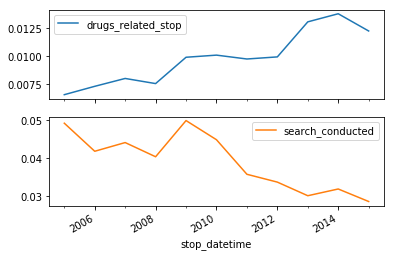

In [44]:
# Calculate and save the annual search rate
annual_search_rate = df.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

# Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, we'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones, which we'll examine further in the next exercise.

In [45]:
# Create a frequency table of districts and violations
print(pd.crosstab(df.district,df.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(df.district,df.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

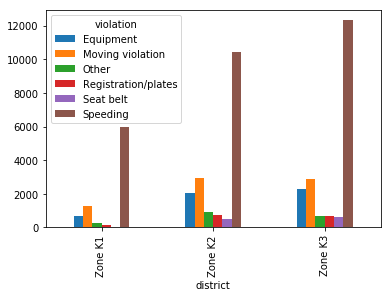

In [46]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

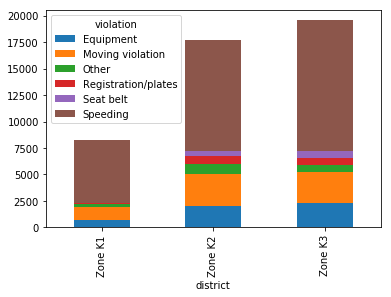

In [47]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

# Converting stop durations to numbers
In the traffic stops dataset, the *stop_duration* column tells  approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as *'0-15 Min'*. How can we make this data easier to analyze?

In this exercise, we'll convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

- Convert '0-15 Min' to 8
- Convert '16-30 Min' to 23
- Convert '30+ Min' to 45

In [48]:
# Print the unique values in 'stop_duration'
print(df.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
df['stop_minutes'] = df.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(df.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


# Plotting stop length
If we were stopped for a particular violation, how long might we expect to be detained?

In this exercise, we'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the *violation* column in this exercise, we'll use *violation_raw* since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


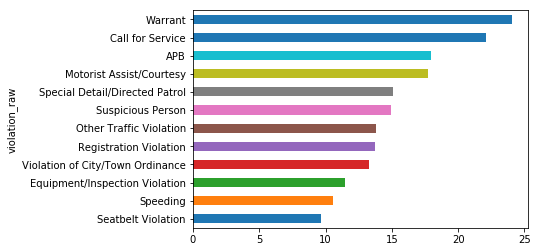

In [49]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(df.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = df.groupby('violation_raw').stop_minutes.mean()
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

In [50]:
wea=pd.read_csv(r'C:\Users\shakera\Desktop\job\datacamp\datacamp\project6\weather.csv')
wea.head()

STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...   WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...    NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...    NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


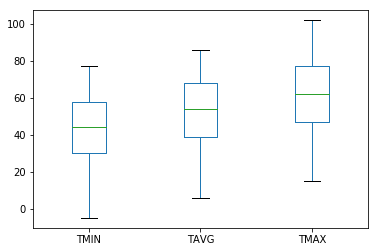

In [51]:
# Describe the temperature columns
print(wea[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
wea[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

# Plotting the temperature difference
In this exercise, we'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do we notice about the resulting histogram? Does it match our expectations, or do we see anything unusual?

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


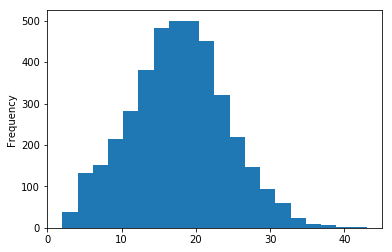

In [52]:
# Create a 'TDIFF' column that represents temperature difference

wea['TDIFF']=wea.TMAX-wea.TMIN
# Describe the 'TDIFF' column
print(wea['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
wea['TDIFF'].plot(kind='hist',bins=20)

# Display the plot
plt.show()

# Counting bad weather conditions
The *weather* DataFrame contains 20 columns that start with *'WT'*, each of which represents a bad weather condition. For example:

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

For every row in the dataset, each *WT* column contains either a 1 (meaning the condition was present that day) or *NaN*(meaning the condition was not present).

In this exercise, we'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

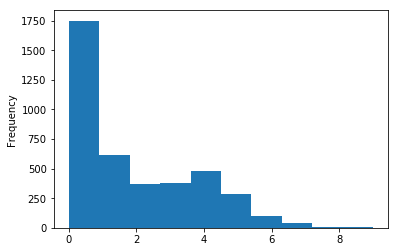

In [53]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = wea.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
wea['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
wea['bad_conditions'] = wea.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
wea.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

# Rating the weather conditions
In the previous exercise, we counted the number of bad weather conditions each day. In this exercise, we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert 0 to 'good'
- Convert 1 through 4 to 'bad'
- Convert 5 through 9 to 'worse'

In [54]:
# Count the unique values in 'bad_conditions' and sort the index
print(wea.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:"worse",8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
wea['rating'] = wea.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(wea.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [55]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
wea['rating'] = wea.rating.astype('category', ordered=True, categories=cats)

# Examine the head of 'rating'
print(wea.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [72]:
# Reset the index of 'ri'
df.reset_index(inplace=True)

# Examine the head of 'ri'
print(df.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=wea[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   index       stop_datetime  stop_date stop_time driver_gender driver_race  \
0      0 2005-01-04 12:55:00   1/4/2005     12:55             M       White   
1      1 2005-01-23 23:15:00  1/23/2005     23:15             M       White   
2      2 2005-02-17 04:15:00  2/17/2005      4:15             M       White   
3      3 2005-02-20 17:15:00  2/20/2005     17:15             M       White   
4      4 2005-02-24 01:20:00  2/24/2005      1:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_relat

In [86]:
# Examine the shape of 'ri'
#f.head()
s=df['stop_date']
df['stop_date']=pd.to_datetime(s)



In [85]:
s=weather_rating['DATE']
weather_rating['DATE']=pd.to_datetime(s)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:

# Examine the shape of 'ri'
print(df.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 17)
(86536, 19)


In [88]:
ri_weather.head()

index  stop_date  \
stop_datetime                           
2005-01-04 12:55:00      0 2005-01-04   
2005-01-23 23:15:00      1 2005-01-23   
2005-02-17 04:15:00      2 2005-02-17   
2005-02-20 17:15:00      3 2005-02-20   
2005-02-24 01:20:00      4 2005-02-24   

                                                             stop_time  \
stop_datetime                                                            
2005-01-04 12:55:00  0        12:55\n1        23:15\n2         4:15...   
2005-01-23 23:15:00  0        12:55\n1        23:15\n2         4:15...   
2005-02-17 04:15:00  0        12:55\n1        23:15\n2         4:15...   
2005-02-20 17:15:00  0        12:55\n1        23:15\n2         4:15...   
2005-02-24 01:20:00  0        12:55\n1        23:15\n2         4:15...   

                    driver_gender driver_race                   violation_raw  \
stop_datetime                                                                   
2005-01-04 12:55:00             M       White  Equipment/Inspection Violation   
2005-01-23 23:15:00             M       White                        Speeding   
2005-02-17 04:15:00             M       White                        Speeding   
2005-02-20 17:15:00             M       White                Call for Service   
2005-02-24 01:20:00             F       White                        Speeding   

                     violation  search_conducted search_type   stop_outcome  \
stop_datetime                                                                 
2005-01-04 12:55:00  Equipment             False         NaN       Citation   
2005-01-23 23:15:00   Speeding             False         NaN       Citation   
2005-02-17 04:15:00   Speeding             False         NaN       Citation   
2005-02-20 17:15:00      Other             False         NaN  Arrest Driver   
2005-02-24 01:20:00   Speeding             False         NaN       Citation   

                     is_arrested stop_duration  drugs_related_stop district  \
stop_datetime                                                                 
2005-01-04 12:55:00        False      0-15 Min               False  Zone X4   
2005-01-23 23:15:00        False      0-15 Min               False  Zone K3   
2005-02-17 04:15:00        False      0-15 Min               False  Zone X4   
2005-02-20 17:15:00         True     16-30 Min               False  Zone X1   
2005-02-24 01:20:00        False      0-15 Min               False  Zone X3   

                     frisk  stop_minutes       DATE rating  
stop_datetime                                               
2005-01-04 12:55:00  False             8 2005-01-04    bad  
2005-01-23 23:15:00  False             8 2005-01-23  worse  
2005-02-17 04:15:00  False             8 2005-02-17   good  
2005-02-20 17:15:00  False            23 2005-02-20    bad  
2005-02-24 01:20:00  False             8 2005-02-24    bad

# Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Find out below!

- First, we'll calculate the overall arrest rate.
- Then, we'll calculate the arrest rate for each of the weather ratings you previously assigned.
- Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since we previously defined a logical order for the weather categories, *good < bad < worse*, they will be sorted that way in the results.

In [89]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [90]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [91]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [92]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
#print(arrest_rate.loc['Moving violation','bad'])

# Print the arrest rates for speeding violations in all three weather conditions
#print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [93]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack)

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

<bound method Series.unstack of violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64>
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.05